<h1><b>House Price Prediction by using linear Regression</h1>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSiB3JaM2F3_8PNSqBFvxZwcCCYJhEn4hx2VA&s" width="500"/>


<h1>House Price Prediction Project Overview</h1>
<p>
  This project aims to predict house prices based on various features using machine learning techniques.
  It involves data preprocessing, feature engineering, and model building to create an accurate price prediction model.
</p>
<p>
  The dataset contains information about houses such as size, location, number of bedrooms, and other relevant features.
  We apply algorithms like Linear Regression and evaluate model performance using metrics such as RMSE and R².
</p>
<p>
  This project helps in understanding how to handle real estate data, prepare it for machine learning, and build
  models that can assist buyers, sellers, and real estate agents in making informed decisions.
</p>


In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Loading the data set
df = pd.read_csv('/content/zameen-updated.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77261 entries, 0 to 77260
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    77261 non-null  int64  
 1   location_id    77261 non-null  int64  
 2   page_url       77261 non-null  object 
 3   property_type  77260 non-null  object 
 4   price          77260 non-null  float64
 5   location       77260 non-null  object 
 6   city           77260 non-null  object 
 7   province_name  77260 non-null  object 
 8   latitude       77260 non-null  float64
 9   longitude      77260 non-null  float64
 10  baths          77260 non-null  float64
 11  area           77260 non-null  object 
 12  purpose        77260 non-null  object 
 13  bedrooms       77260 non-null  float64
 14  date_added     77260 non-null  object 
 15  agency         41020 non-null  object 
 16  agent          41020 non-null  object 
 17  Area Type      77260 non-null  object 
 18  Area S

In [4]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000.0,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2.0,4 Marla,For Sale,2.0,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000.0,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3.0,5.6 Marla,For Sale,3.0,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000.0,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6.0,8 Marla,For Sale,5.0,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000.0,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4.0,2 Kanal,For Sale,4.0,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000.0,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3.0,8 Marla,For Sale,3.0,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


<h1> Some of our area are given in Kanal and some in Marla
<h2> As 1 Kanal = 20 Marla  
so we are just looking for Kanal in Area type col and then multiplying the Area size col with 20 + updating the Kanal into Marla to format our data set

In [9]:
for i in df.index:
    if df.at[i, 'Area Type'] == 'Kanal':
        # Multiply the next column (Size) by 20
        df.at[i, 'Area Size'] = df.at[i, 'Area Size'] * 20
        df.at[i, 'Area Type'] = 'Marla'

In [10]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000.0,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2.0,4 Marla,For Sale,2.0,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000.0,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3.0,5.6 Marla,For Sale,3.0,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000.0,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6.0,8 Marla,For Sale,5.0,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000.0,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4.0,2 Kanal,For Sale,4.0,04-05-2019,NaN,NaN,Marla,40.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000.0,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3.0,8 Marla,For Sale,3.0,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


<h2> As city col has different cities so in order to convert data set to numerical we may have to assign them dummy values later in the process

In [15]:
# Number of unique cities
num_cities = df['city'].nunique()

# List of unique cities
cities = df['city'].unique()

c = df['city'].value_counts()
print(c)
print("Number of cities:", num_cities)
print("Cities:", cities)


city
Karachi       28293
Lahore        17569
Islamabad     17504
Rawalpindi     9791
Faisalabad     4103
Name: count, dtype: int64
Number of cities: 5
Cities: ['Islamabad' 'Lahore' 'Faisalabad' 'Rawalpindi' 'Karachi' nan]


In [17]:
count = 0
for i in df['city']:
  if(i == 'nan'):
    count = count + 1
print(count)

0


<h1> The purpose col of our data set has 2 type of values<ul><li>For sale<li>For rent
<h2> So here we can do 2 things either to split our data set into to portion or assigning "for sale" as 1 and "for rent" as 0. So here we are are maping it with 0 and 1 because it seems more effective.
<h3> Although if you want to split and then work on that you can do it by
<h3>df_sale = df[df['purpose'] == 'For Sale']<h3>
df_rent = df[df['purpose'] == 'For Rent']

In [250]:
# Number of unique cities
purpose_no = df['purpose'].nunique()

# List of unique cities
purpose_list = df['purpose'].unique()

c = df['purpose'].value_counts()
print(c)
print("no of different purpose:", purpose_no)
print("types:", purpose_list)


purpose
1.0    56382
0.0    20878
Name: count, dtype: int64
no of different purpose: 2
types: [ 1.  0. nan]


In [22]:
df['purpose'] = df['purpose'].map({'For Sale': 1, 'For Rent': 0})


In [23]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000.0,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2.0,4 Marla,1.0,2.0,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000.0,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3.0,5.6 Marla,1.0,3.0,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000.0,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6.0,8 Marla,1.0,5.0,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000.0,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4.0,2 Kanal,1.0,4.0,04-05-2019,NaN,NaN,Marla,40.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000.0,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3.0,8 Marla,1.0,3.0,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


<h2> As property_type col have different values so we will assign them dummy values later on

In [249]:
# Number of unique cities
property_type_num = df['property_type'].nunique()

# List of unique cities
property_type_list = df['property_type'].unique()

c = df['property_type'].value_counts()
print(c)
print("Number of different type of properties:", property_type_num)
print("Types:", property_type_list)


property_type
House            47870
Flat             18878
Upper Portion     5606
Lower Portion     3827
Room               452
Farm House         372
Penthouse          255
Name: count, dtype: int64
Number of different type of properties: 7
Types: ['Flat' 'House' 'Penthouse' 'Farm House' 'Lower Portion' 'Upper Portion'
 'Room' nan]


<h2> We are extracting the col we need and storing it in a variable "data".Here we are not directly making changes in "df" because in case of mistake we can easily run the cell and retreive from there


In [226]:
data = df[['city', 'baths', 'property_type' , 'purpose', 'bedrooms','Area Size', 'price']]

In [227]:
data.head()

,city,baths,property_type,purpose,bedrooms,Area Size,price
0,Islamabad,2.0,Flat,1.0,2.0,4.0,10000000.0
1,Islamabad,3.0,Flat,1.0,3.0,5.6,6900000.0
2,Islamabad,6.0,House,1.0,5.0,8.0,16500000.0
3,Islamabad,4.0,House,1.0,4.0,40.0,43500000.0
4,Islamabad,3.0,House,1.0,3.0,8.0,7000000.0


<h1> As linear regression does not work on textual dat aso we are using dummy values

In [228]:
data = pd.get_dummies(data, columns=['city'], drop_first=True,dtype=int)


In [229]:
data.head()

,baths,property_type,purpose,bedrooms,Area Size,price,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi
0,2.0,Flat,1.0,2.0,4.0,10000000.0,1,0,0,0
1,3.0,Flat,1.0,3.0,5.6,6900000.0,1,0,0,0
2,6.0,House,1.0,5.0,8.0,16500000.0,1,0,0,0
3,4.0,House,1.0,4.0,40.0,43500000.0,1,0,0,0
4,3.0,House,1.0,3.0,8.0,7000000.0,1,0,0,0


<h1> As linear regression does not work on textual dat aso we are using dummy values

In [230]:
data = pd.get_dummies(data, columns=['property_type'], drop_first=True,dtype=int)


In [231]:
data.head()

,baths,purpose,bedrooms,Area Size,price,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion
0,2.0,1.0,2.0,4.0,10000000.0,1,0,0,0,1,0,0,0,0,0
1,3.0,1.0,3.0,5.6,6900000.0,1,0,0,0,1,0,0,0,0,0
2,6.0,1.0,5.0,8.0,16500000.0,1,0,0,0,0,1,0,0,0,0
3,4.0,1.0,4.0,40.0,43500000.0,1,0,0,0,0,1,0,0,0,0
4,3.0,1.0,3.0,8.0,7000000.0,1,0,0,0,0,1,0,0,0,0


<h2> Linear regression does not work if there are missing values there were few price col so droping those rows we could also have fill them with mean but as the the number is really small it does not make any impact so we are proceding

In [232]:
data = data.dropna(subset=['price'])

In [233]:
data.head()

,baths,purpose,bedrooms,Area Size,price,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion
0,2.0,1.0,2.0,4.0,10000000.0,1,0,0,0,1,0,0,0,0,0
1,3.0,1.0,3.0,5.6,6900000.0,1,0,0,0,1,0,0,0,0,0
2,6.0,1.0,5.0,8.0,16500000.0,1,0,0,0,0,1,0,0,0,0
3,4.0,1.0,4.0,40.0,43500000.0,1,0,0,0,0,1,0,0,0,0
4,3.0,1.0,3.0,8.0,7000000.0,1,0,0,0,0,1,0,0,0,0


In [234]:
# Importing the libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<h2> Extracting the input and output col

In [251]:
#  input cols
X = data.drop(columns=['price'])
#  output col
y = data['price']

<h2> Train / Test split

In [252]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2, random_state=42)

<h2> We are making a pipe line if any missing value occurs it fills with median then it rescales our data set  and choses the model Lnear regression "

In [237]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [238]:
# Training the model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

<h2> It shows that our model is not trained well because accuracy is very low

In [239]:
from sklearn.metrics import r2_score
print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.14774521066187207


<h2> After so many arrangement still model prediction is poor so we are going to make some visualization in order to know the trend of data and we may find the issues

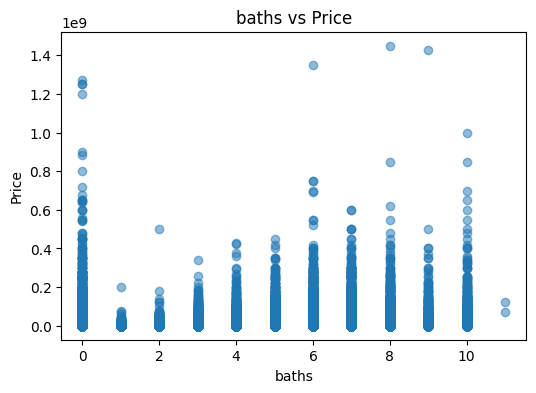

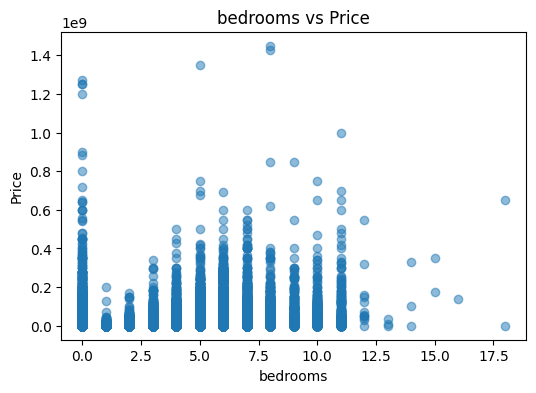

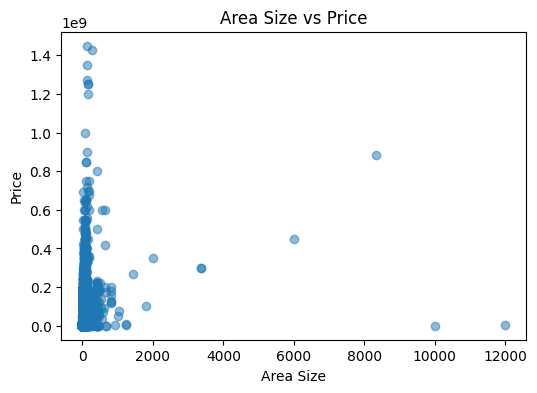

In [240]:
import matplotlib.pyplot as plt

# Choose a few numeric features to check
features = ['baths', 'bedrooms', 'Area Size']

for feature in features:
    plt.figure(figsize=(6,4))
    plt.scatter(data[feature], data['price'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'{feature} vs Price')
    plt.show()


<h2> The issues that we found out is that the data is not sort of linear there are two many outliers so we are just going to do some changes in the price col and after that we will retrain our model

In [241]:
max_price = data['price'].max()
print(max_price)
min_price = data['price'].min()
print(min_price)
average_price = data['price'].mean()
print(average_price)

1450000000.0
0.0
19217277.253727674


In [242]:
data.shape

(77260, 15)

<h2> Only taking those rows that have price less then or equals to average price

In [243]:
data = data[data['price'] <= 19217277]


In [244]:
data.shape

(56671, 15)

<h2> Repeating the steps to see the accuracy of our data

In [246]:
X = data.drop(columns=['price'])
y = data['price']

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import r2_score
print("R² Score:", r2_score(y_test, y_pred))




R² Score: 0.6436507465436023


Hence now its 64% While previous was only 14% so its a great improvement

<h1><b> Basically it is not the accuracy it is the varience we can say that our model expalins 64% of the data to be precise. But still we can say that it is that much accurate  

In [253]:
data.to_csv('updated_dataset.csv', index=False)
from google.colab import files
files.download('updated_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>